In [1]:
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
%autosave 5

# necessary modules -------------------------------------------------------------------------------------
import sys
import os

home = os.path.expanduser("~")
sys.path.append(home+ '/py_f2recom/modules/')
sys.path.append(home+ '/py_f2recom/modules/pyfesom2')
sys.path.append(home+ '/py_f2recom/GlobalAssessment/')
sys.path.append(home+ '/py_f2recom/modules/SkillMetrics/')
sys.path.append(home+ '/py_f2recom/modules/cmocean-master/')
import skill_metrics as sm
import pyfesom2 as pf
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import cmocean as cmo
import matplotlib.colors as colors
import time
from datetime import date
import cartopy.crs as ccrs
import cartopy.feature as cfeature

Autosaving every 5 seconds


In [2]:
runid      =  'fesom'
resultpath = '/albedo/work/projects/MarESys/GCB2022/A/'
meshpath = '/albedo/work/projects/p_bio/mesh/core2/'
# period of analysis 
first_year = 2012
last_year  = 2021
depth_limit = 10
mapproj = 'rob' # pf.get_proj('rob')
box=[-180, 180, -90, 90]

evalpath = '/albedo/work/projects/p_pool_recom/eval/'
evalpath2 = '/albedo/work/projects/MarESys/ogurses/input/corrected_input/'

ncfilePHC3 = evalpath2+'phc3.0_annual.nc'

savepath       = !pwd

mesh       = pf.load_mesh(meshpath)
meshdiag = pf.get_meshdiag(mesh)
years = np.arange(first_year, last_year+1,1)

unit_t = 'T$_C$ [$^{\circ}$C]' 
unit_s = 'S$_A$ [g kg$^{-1}$]' 

/albedo/work/projects/p_bio/mesh/core2/pickle_mesh_py3_fesom2
The usepickle == True)
The pickle file for FESOM2 exists.
The mesh will be loaded from /albedo/work/projects/p_bio/mesh/core2/pickle_mesh_py3_fesom2


In [3]:
from TS_PHC3_Comparison_python3 import PHC3tempcomp, PHC3salcomp

In [4]:
TEMPdata = PHC3tempcomp(runid,resultpath,savepath,mesh,ncfilePHC3,first_year,last_year, 
                depth_limit=depth_limit, plotting = False, output = True, Taylor = False)

***
Loading PHC file: /albedo/work/projects/MarESys/ogurses/input/corrected_input/phc3.0_annual.nc
***
***
Depth greater in FESOM (-6125.0) than in PHC (-5500.0)
Temp as mean over depth 
with max layer depth = 15.0 
(level depth = 10.0m, mesh index 2)

FESOM min = -1.8477542400360107, max = 30.111412048339844
PHC min = -1.7858999999999998, max = 29.807000000000002


In [5]:
SALdata = PHC3salcomp(runid,resultpath,savepath,mesh,ncfilePHC3,first_year,last_year, 
                depth_limit=depth_limit, plotting = False, output = True, Taylor = False)

***
Loading PHC file: /albedo/work/projects/MarESys/ogurses/input/corrected_input/phc3.0_annual.nc
***
***
Depth greater in FESOM (-6125.0) than in PHC (-5500.0)
SAL as mean over depth 
with max layer depth = 15.0 
(level depth = 10.0m, mesh index 2)

FESOM min = 3.9666932870644613, max = 40.22112476591198
PHC min = 3.57075, max = 39.77005


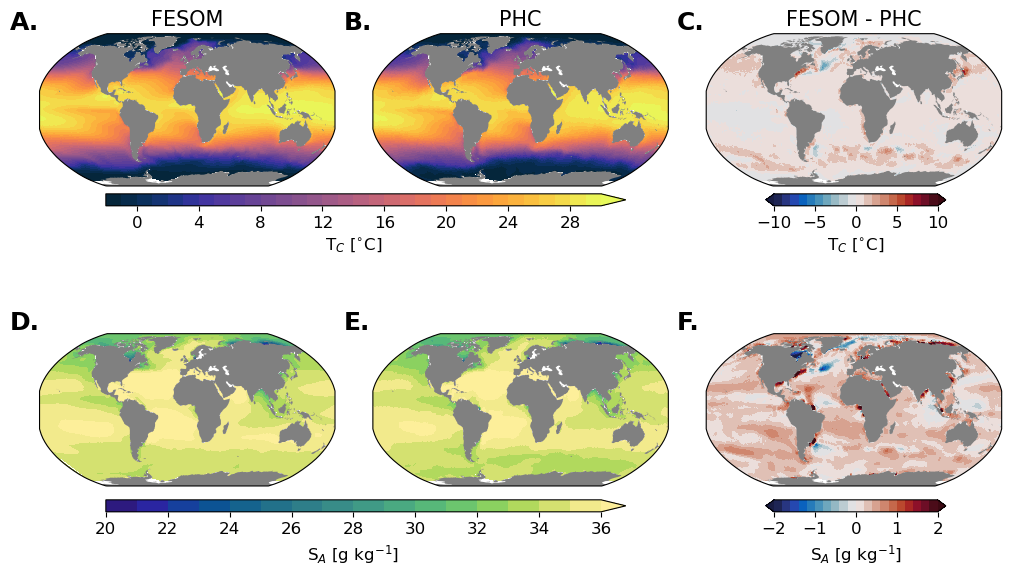

In [6]:
fig, ax = pf.create_proj_figure(mapproj, (2,3), (10,6))
#fig.tight_layout(pad=3.0)

ax = ax.flatten()

levels_t = np.arange(-2,31,1)
levels_t_anom = np.arange(-10,11,1)
levels_t_anom_ticks = np.arange(-10,15,5)
levels_s = np.arange(20,37,1)
levels_s_anom = np.arange(-2,2.2,.2)
levels_s_anom_ticks = np.arange(-2,3,1)

m1 = ax[0]
f1 = pf.subplot(mesh, fig, m1, [TEMPdata.temp_fesom], 
                                levels = levels_t,
                                units=unit_t, 
                                mapproj=mapproj, # robinson projection takes more time!
                                cmap = cmo.cm.thermal,
                                cmap_extension='max',
                                titles='FESOM',
                                title_size = 15,
                               )

m2 = ax[1]
f2 = pf.subplot(mesh, fig, m2, [TEMPdata.temp_phc], 
                                levels = levels_t,
                                units=unit_t, 
                                mapproj=mapproj, # robinson projection takes more time!
                                cmap = cmo.cm.thermal,
                                cmap_extension='max',
                                titles='PHC',
                                title_size = 15,
                               )


cbar1_ax = fig.add_axes([0.1, 0.59, 0.52, 0.02])
cbar1 = fig.colorbar(f1,
                                    cax = cbar1_ax, 
                                    orientation = 'horizontal',
                                    fraction=0.046, pad=0.04) 
cbar1.set_label(unit_t, fontsize=12)
cbar1.ax.tick_params(labelsize=12)


levels = np.arange(-100,120,20)

m3 = ax[2]
f3 = pf.subplot(mesh, fig, m3, [TEMPdata.temp_fesom - TEMPdata.temp_phc], 
                                levels = levels_t_anom,
                                units=unit_t, 
                                mapproj=mapproj, # robinson projection takes more time!
                                cmap = cmo.cm.balance,
                                cmap_extension='both',
                                titles='FESOM - PHC',
                                title_size = 15,
                               )

cbar3_ax = fig.add_axes([0.76, 0.59, 0.18, 0.02])
cbar3 = fig.colorbar(f3,
                                    cax = cbar3_ax, 
                                    orientation = 'horizontal',
                                    fraction=0.046, pad=0.04,
                                    ticks = levels_t_anom_ticks) 
cbar3.set_label(unit_t, fontsize=12)
cbar3.ax.tick_params(labelsize=12)

levels = np.arange(2100,2600,100)

m4 = ax[3]
f4 = pf.subplot(mesh, fig, m4, [SALdata.sal_fesom], 
                                levels = levels_s,
                                units=unit_s, 
                                mapproj=mapproj, # robinson projection takes more time!
                                cmap = cmo.cm.haline,
                                cmap_extension='max',
                                titles='',
                                title_size = 15,
                               )

m5 = ax[4]
f5 = pf.subplot(mesh, fig, m5, [SALdata.sal_phc], 
                                levels = levels_s,
                                units=unit_s, 
                                mapproj=mapproj, # robinson projection takes more time!
                                cmap = cmo.cm.haline,
                                cmap_extension='max',
                                titles='',
                                title_size = 15,
                               )


cbar5_ax = fig.add_axes([0.1, 0.08, 0.52, 0.02])
cbar5 = fig.colorbar(f5,
                                    cax = cbar5_ax, 
                                    orientation = 'horizontal',
                                    fraction=0.046, pad=0.04) 
cbar5.set_label(unit_s, fontsize=12)
cbar5.ax.tick_params(labelsize=12)


levels = np.arange(-100,120,20)

m6 = ax[5]
f6 = pf.subplot(mesh, fig, m6, [SALdata.sal_fesom - SALdata.sal_phc], 
                                levels = levels_s_anom,
                                units=unit_s, 
                                mapproj=mapproj, # robinson projection takes more time!
                                cmap = cmo.cm.balance,
                                cmap_extension='both',
                                titles='',
                                title_size = 15,
                               )

cbar6_ax = fig.add_axes([0.76, 0.08, 0.18, 0.02])
cbar6 = fig.colorbar(f6,
                                    cax = cbar6_ax, 
                                    orientation = 'horizontal',
                                    fraction=0.046, pad=0.04,
                                    ticks = levels_s_anom_ticks) 
cbar6.set_label(unit_s, fontsize=12)
cbar6.ax.tick_params(labelsize=12)

m1.text(-0.1, 1.03, 'A.', transform=m1.transAxes,
            size=18, weight='bold')
m2.text(-0.1, 1.03, 'B.', transform=m2.transAxes,
            size=18, weight='bold')
m3.text(-0.1, 1.03, 'C.', transform=m3.transAxes,
            size=18, weight='bold')
m4.text(-0.1, 1.03, 'D.', transform=m4.transAxes,
            size=18, weight='bold')
m5.text(-0.1, 1.03, 'E.', transform=m5.transAxes,
            size=18, weight='bold')
m6.text(-0.1, 1.03, 'F.', transform=m6.transAxes,
            size=18, weight='bold')

plt.savefig('FIG_TS.png', dpi = 300, bbox_inches='tight',transparent=False)
plt.savefig('FIG_TS.pdf', bbox_inches='tight',transparent=False)

In [7]:
levels_t_anom

array([-10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,  -2,  -1,   0,   1,   2,
         3,   4,   5,   6,   7,   8,   9,  10])

In [8]:
levels_t_anom_ticks

array([-10,  -5,   0,   5,  10])